In [2]:
import seaborn as sns

In [9]:
iris_dataset = sns.load_dataset('iris')
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

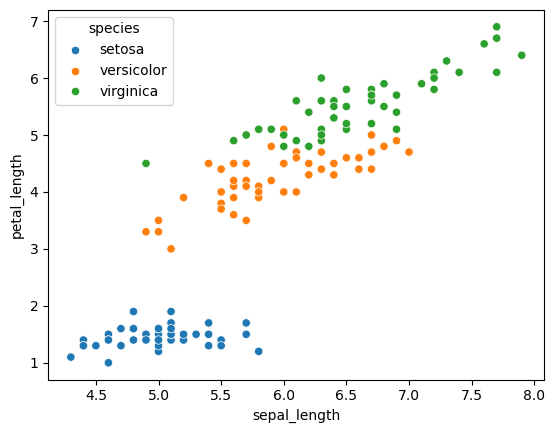

In [13]:
sns.scatterplot(data=iris_dataset, x='sepal_length', y='petal_length', hue='species')

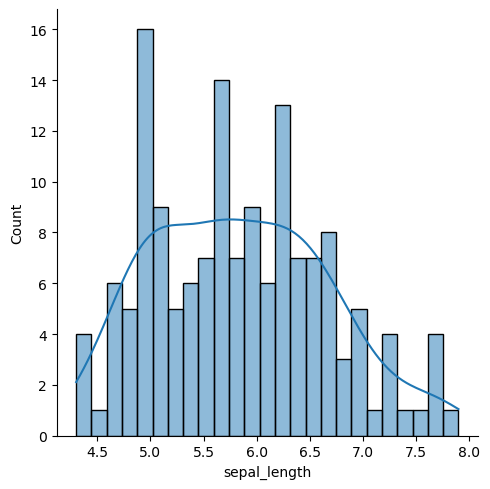

In [16]:
sns.displot(iris_dataset, bins=25, x='sepal_length', kde=True)